In [1]:
!pip install tensorflow

     -------------------------------------- 455.9/455.9 MB 3.3 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 7.8 MB/s eta 0:00:00
     ------------------------------------- 895.7/895.7 kB 14.3 MB/s eta 0:00:00
     ---------------------------------------- 57.5/57.5 kB 1.0 MB/s eta 0:00:00
     ------------------------------------- 438.7/438.7 kB 26.8 MB/s eta 0:00:00
     ---------------------------------------- 3.6/3.6 MB 23.0 MB/s eta 0:00:00
     ---------------------------------------- 5.9/5.9 MB 12.5 MB/s eta 0:00:00
     ---------------------------------------- 42.6/42.6 kB 1.0 MB/s eta 0:00:00
     ---------------------------------------- 65.5/65.5 kB 3.5 MB/s eta 0:00:00
     ---------------------------------------- 2.6/2.6 MB 23.7 MB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 18.0 MB/s eta 0:00:00
     -------------------------------------- 123.4/123.4 kB 7.5 MB/s eta 0:00:00
     --------------------------------------- 1

In [2]:
from tensorflow import keras

In [13]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

3

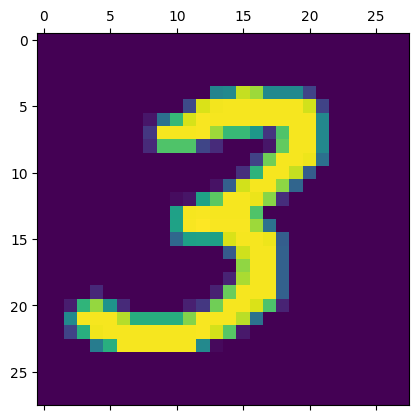

In [16]:
import matplotlib.pyplot as plt

i = 135
plt.matshow(x_train[i])
y_train[i]

In [23]:
from sklearn.linear_model import Perceptron

x_trainF = x_train.reshape(x_train.shape[0], -1)
x_testF = x_test.reshape(x_test.shape[0], -1)

p = Perceptron()
p.fit(x_trainF, y_train)

print("Training data scores: ",p.score(x_trainF, y_train))
print("Test data scores: ", p.score(x_testF, y_test))


Training data scores:  0.8853833333333333
Test data scores:  0.8805


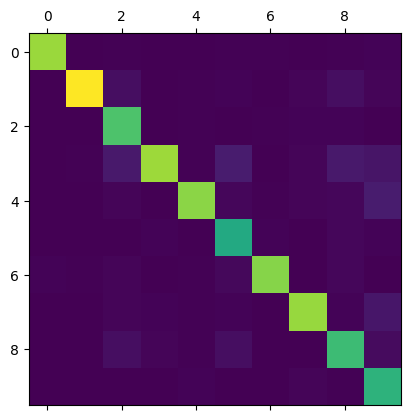

In [24]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(p.predict(x_testF), y_test)
plt.matshow(cm)

In [38]:
from math import inf
import math
test = 50


model = keras.models.Sequential([
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    #output_layer
    keras.layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer = 'adam',
    loss = keras.losses.sparse_categorical_crossentropy,
    metrics = ['accuracy']    
)

model.fit(x_trainF, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2280 - accuracy: 0.9333
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0959 - accuracy: 0.9704
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0662 - accuracy: 0.9790
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0504 - accuracy: 0.9836
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0414 - accuracy: 0.9865


In [44]:
model.evaluate(x_testF, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0935 - accuracy: 0.9718


[0.09347697347402573, 0.9718000292778015]

313/313 [==============================] - 0s 1ms/step


array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

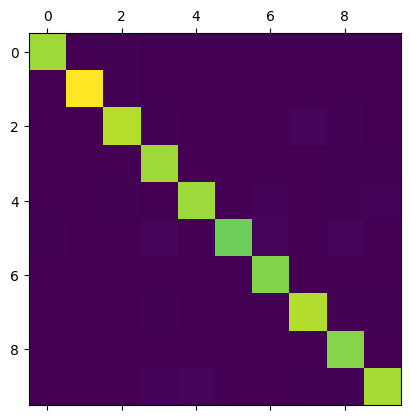

In [51]:
predictions = model.predict(x_testF).argmax(1)

cm = confusion_matrix(predictions, y_test)
plt.matshow(cm)